In [20]:
import pandas as pd
import numpy as np
from collections import Counter
#import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt

In [4]:
df = pd.read_excel ('dataset2.xlsx')
df

,Unnamed: 0,hardness,tensile,elongation,sg,bursting,crack
0,0,70,124,427,1.24,2.29,No crack
1,1,71,134,483,1.25,2.46,No crack
2,2,69,117,406,1.25,2.26,No crack
3,3,71,114,408,1.26,2.31,No crack
4,4,69,117,384,1.24,2.29,No crack
...,...,...,...,...,...,...,...
959,959,70,109,375,1.27,2.16,No crack
960,960,70,110,437,1.26,2.28,No crack
961,961,73,106,338,1.27,2.10,Crack
962,962,71,119,434,1.28,2.27,No crack


In [5]:
X = df.iloc[:, -1].values

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
lec_X = LabelEncoder()
X = lec_X.fit_transform(X)

In [8]:
y = pd.DataFrame(X)

In [9]:
y.columns = ['cr']

In [10]:
y

,cr
0,1
1,1
2,1
3,1
4,1
...,...
959,1
960,1
961,0
962,1


In [11]:
df2 = pd.concat((df, y), axis=1)
df2

,Unnamed: 0,hardness,tensile,elongation,sg,bursting,crack,cr
0,0,70,124,427,1.24,2.29,No crack,1
1,1,71,134,483,1.25,2.46,No crack,1
2,2,69,117,406,1.25,2.26,No crack,1
3,3,71,114,408,1.26,2.31,No crack,1
4,4,69,117,384,1.24,2.29,No crack,1
...,...,...,...,...,...,...,...,...
959,959,70,109,375,1.27,2.16,No crack,1
960,960,70,110,437,1.26,2.28,No crack,1
961,961,73,106,338,1.27,2.10,Crack,0
962,962,71,119,434,1.28,2.27,No crack,1


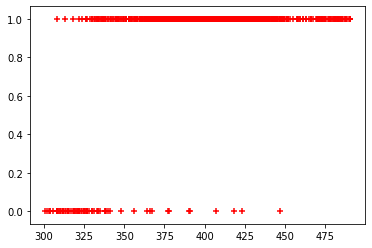

In [12]:
plt.scatter(df2.elongation,df2.cr,marker='+',color='red')

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2[['elongation']],df2.cr,test_size=0.3)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [16]:
model.predict(X_test)

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [17]:
model.score(X_test,y_test)

0.9586206896551724

In [25]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'), y_train)

C:\Users\AnggiDast\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [26]:
print("Before SMOTE: ", Counter(y_train))
print("After SMOTE: ", Counter(y_train_smote))

Before SMOTE:  Counter({1: 610, 0: 64})
After SMOTE:  Counter({0: 610, 1: 610})


In [29]:
model.fit(X_train_smote, y_train_smote)
y_predict = model.predict(X_test)
print(accuracy_score(y_test, y_predict))
pd.crosstab(y_test, y_predict)

0.8689655172413793


col_0,0,1
cr,,
0,16,4
1,34,236


In [30]:
print(y_predict)

[1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1]


In [26]:
target = 'cr'

1    880
0     84
Name: cr, dtype: int64


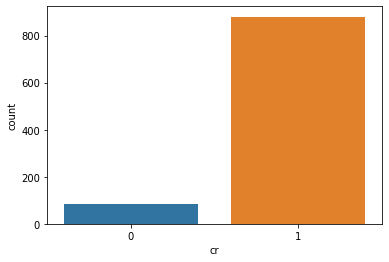

In [32]:
import seaborn as sns
ax = sns.countplot(x=target, data=df2)
print(df2[target].value_counts())

NameError: name 'np' is not defined

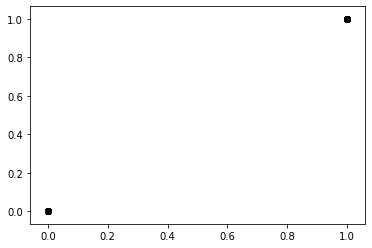

In [25]:
#plt.figure(1, figsize=(4, 3))
#plt.model()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * model.coef_ + model.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

#ols = linear_model.LinearRegression()
#ols.fit(X, y)
#plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
#plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()